In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
bean = pd.read_csv("C:/Users/user/OneDrive/桌面/雲科/碩一上/資料探勘/HW3/Dry_Bean_Dataset.csv")
bean

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [21]:
bean.apply(lambda x:np.sum(x==' ?'))

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [22]:
labelencoder = LabelEncoder()
bean_v2=pd.DataFrame(bean)
bean_v2['Class'] = labelencoder.fit_transform(bean_v2['Class'])
bean_v2

scaler = MinMaxScaler(feature_range=(0, 1)).fit(bean_v2)
x_scaled = scaler.transform(bean_v2)
bean_final=pd.DataFrame(x_scaled,columns=bean_v2.columns)
bean_final

X = bean_final.drop(labels=['Class','Area','Perimeter','AspectRation','Eccentricity','ConvexArea','EquivDiameter',
                            'Extent','Solidity','roundness','Compactness'],axis=1)
bean_class = bean_final['Class'].values

#,'MajorAxisLength','MinorAxisLength'

In [23]:
X

,MajorAxisLength,MinorAxisLength,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,0.044262,0.152142,0.593432,0.833049,0.750996,0.980620
1,0.030479,0.178337,0.547447,0.967316,0.884987,0.974979
2,0.052633,0.158190,0.582016,0.800942,0.736200,0.987196
3,0.048548,0.177691,0.552408,0.854744,0.799846,0.893675
4,0.032862,0.200679,0.510741,1.000000,0.941770,0.989116
...,...,...,...,...,...,...
13606,0.189318,0.187843,0.531785,0.382135,0.412185,0.974113
13607,0.176450,0.201964,0.509582,0.426233,0.470848,0.970912
13608,0.176384,0.203370,0.508683,0.427019,0.472240,0.943025
13609,0.179703,0.200669,0.514216,0.415330,0.456919,0.913342


In [24]:

#開始測量時間
start = time.time()

kmeans = KMeans(n_clusters=7,random_state=42).fit(X)
y_pred = kmeans.fit_predict(X)
print("分群結果如下")
print(y_pred)

#結束時間
end = time.time()
print("運行時間: ",end-start)

y_true = bean_class


分群結果如下
[4 4 4 ... 3 3 3]
運行時間:  0.9235293865203857


In [25]:
#所有點到每群集中心距離的平方和
kmeans.inertia_

263.6791152696403

In [26]:
#特徵中心點
kmeans.cluster_centers_

array([[0.10042839, 0.11701546, 0.67009226, 0.53738041, 0.47029057,
        0.94639561],
       [0.32909847, 0.35835372, 0.32588495, 0.2793395 , 0.44771471,
        0.92384936],
       [0.33934612, 0.18061375, 0.55314426, 0.15523395, 0.14267357,
        0.86082745],
       [0.19808178, 0.19533032, 0.5251943 , 0.37391273, 0.40774734,
        0.92546961],
       [0.11631601, 0.23169042, 0.46908833, 0.64969783, 0.70655696,
        0.97245224],
       [0.73815685, 0.74595608, 0.08647888, 0.08995875, 0.38715698,
        0.84814495],
       [0.40753943, 0.33461035, 0.35243102, 0.17220522, 0.28248012,
        0.82136507]])

In [27]:

def purity_score(y_true, y_pred):
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

a = purity_score(y_true, y_pred)
print("分群績效: ",a)


分群績效:  0.8564396444052604


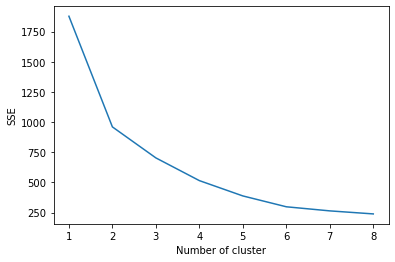

In [28]:
sse = {}
for k in range(1, 9):
    kmeans = KMeans(n_clusters=k,random_state=42).fit(X)    
    sse[k] = kmeans.inertia_ #樣本到它們最近的聚類中心的距離總和
    
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [31]:
print("Metrics rand index %0.3f" % metrics.rand_score(y_true, y_pred))
print("Metrics adjustd rand index %0.3f" % metrics.adjusted_rand_score(y_true, y_pred))

Metrics rand index 0.909
Metrics adjustd rand index 0.681


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
